# Answer Research Questions

## RQ1. What is the coverage of the publications available in IRIS (strictly concerning research conducted within the University of Bologna) in OpenCitations Meta?

In [70]:
import polars as pl

# new iim, extracted using types and unique internal ids
lf_iim = pl.scan_parquet('../data/iris_in_meta/*.parquet')
print(lf_iim.select(pl.len()).collect())
print(lf_iim.filter(pl.col('id').str.contains('doi')).select(pl.len()).collect().item())
print(lf_iim.filter(pl.col('id').str.contains('pmid')).select(pl.len()).collect().item())
print(lf_iim.filter(pl.col('id').str.contains('isbn')).select(pl.len()).collect().item())

shape: (1, 1)
┌────────┐
│ len    │
│ ---    │
│ u32    │
╞════════╡
│ 141591 │
└────────┘
140488
988
115


## RQ2. Which are the types of publications that are better covered in OpenCitations Meta?

In [71]:
#rq2 = lf_iim.group_by('iris_type').len(name='meta_len').sort('meta_len', descending=True).with_columns(pl.col('type').str.replace(r"^$", 'no type')).rename({'type': 'meta_type'}).collect(streaming=True)
rq2 = lf_iim.group_by('meta_type').len().sort('len', descending=True).with_columns(pl.col('meta_type').str.replace(r"^$", 'no type')).collect()

rq2

meta_type,len
str,u32
"""journal article""",124317
"""proceedings article""",6837
"""book chapter""",5776
null,3585
"""book""",804
"""web content""",89
"""proceedings""",60
"""reference entry""",43
"""report""",30


### Type analysis

#### Get IRIS types

In [67]:
import sys
sys.path.append('../src')

import polars as pl
pl.Config.set_tbl_rows(30)

from iris import get_iris_pids

#iris_path = '../data/POSTPROCESS-iris-data-2024-06-04.zip'
iris_path = '/run/media/leo/b9827f00-f8da-4458-bc94-97b28f1a0989/iris-data-2025-05-30.zip'

dois_pmids_isbns_filtered = get_iris_pids(iris_path)
print(dois_pmids_isbns_filtered.shape)
dois_pmids_isbns_filtered.head(5)

(182989, 3)


iris_id,iris_type,id
i64,i64,str
70006,35,"""doi:10.1441/13328"""
73478,35,"""doi:10.2110/palo.2005.p05-020r"""
157248,35,"""doi:10.1007/jhep07(2012)133"""
155300,40,"""doi:10.1016/s0021-9290(12)7022…"
156226,35,"""doi:10.1016/j.compstruct.2011.…"


In [68]:
from iris import get_iris_type_dict

#We create a dictionary that maps the types' labels to their descriptions: 
iris_types_map = get_iris_type_dict(iris_path)
iris_types_map

{35: '1.01 Articolo in rivista',
 36: '1.02 Nota a sentenza',
 37: '1.03 Recensione in rivista',
 38: '1.04 Replica / breve intervento (e simili)',
 39: '1.05 Scheda bibliografica',
 40: '1.06 Abstract in rivista',
 41: '2.01 Capitolo / saggio in libro',
 42: '2.02 Prefazione',
 43: '2.03 Postfazione',
 44: '2.04 Breve introduzione',
 45: '2.05 Voce in dizionario o enciclopedia',
 46: '2.06 Commento giuridico',
 47: '2.07 Scheda di catalogo',
 48: '2.08 Recensione in volume',
 49: '3.01 Monografia / trattato scientifico in forma di libro',
 50: '3.02 Curatela',
 51: '3.03 Edizione critica',
 52: '3.04 Pubblicazione di fonti inedite',
 53: '3.05 Concordanze',
 54: '3.06 Indice',
 55: '3.07 Bibliografia',
 56: '3.08 Edizione annotata/scolastica',
 57: '4.01 Contributo in Atti di convegno',
 58: '4.02 Riassunto (Abstract)',
 59: '4.03 Poster',
 60: '5.01 Libro (Traduzione)',
 61: '5.02 Contributo in volume (Traduzione)',
 62: '5.03 Contributo in rivista (Traduzione)',
 63: '5.04 Traduzion

In [74]:
iris_pids_type_count = dois_pmids_isbns_filtered.group_by('iris_type').len().sort('len', descending=True).with_columns(pl.col('iris_type').replace_strict(iris_types_map))
iris_pids_type_count

iris_type,len
str,u32
"""1.01 Articolo in rivista""",137759
"""2.01 Capitolo / saggio in libr…",15752
"""4.01 Contributo in Atti di con…",15495
"""3.01 Monografia / trattato sci…",3577
"""1.04 Replica / breve intervent…",2270
"""3.02 Curatela""",1843
"""1.03 Recensione in rivista""",1231
"""1.06 Abstract in rivista""",1105
"""4.02 Riassunto (Abstract)""",912


In [76]:
iim_iris_type_count = lf_iim.group_by('iris_type').len().sort('len', descending=True).collect()
iim_iris_type_count

iris_type,len
str,u32
"""1.01 Articolo in rivista""",123540
"""4.01 Contributo in Atti di con…",9831
"""2.01 Capitolo / saggio in libr…",4593
"""1.04 Replica / breve intervent…",1754
"""1.06 Abstract in rivista""",408
"""1.03 Recensione in rivista""",312
"""3.01 Monografia / trattato sci…",299
"""3.02 Curatela""",256
"""4.02 Riassunto (Abstract)""",167


In [107]:
iris_pids_type_count.join(iim_iris_type_count, on='iris_type', how='left').with_columns(pl.col('len_right').fill_null(strategy='zero')).with_columns(pl.col('len').sub(pl.col('len_right')).alias('not found')).sort(by='not found', descending=True).with_columns(((pl.col('len_right') *100 / pl.col('len')).round(2)).alias('% found')).rename({'len': 'in IRIS', 'len_right': 'found in Meta'})#.filter(~pl.col('diff').is_null())

iris_type,in IRIS,found in Meta,not found,% found
str,u32,u32,u32,f64
"""1.01 Articolo in rivista""",137759,123540,14219,89.68
"""2.01 Capitolo / saggio in libr…",15752,4593,11159,29.16
"""4.01 Contributo in Atti di con…",15495,9831,5664,63.45
"""3.01 Monografia / trattato sci…",3577,299,3278,8.36
"""3.02 Curatela""",1843,256,1587,13.89
"""1.03 Recensione in rivista""",1231,312,919,25.35
"""4.02 Riassunto (Abstract)""",912,167,745,18.31
"""1.06 Abstract in rivista""",1105,408,697,36.92
"""1.04 Replica / breve intervent…",2270,1754,516,77.27


In [119]:
type_comparison = pl.concat([rq2, iim_iris_type_count.rename({'len': 'len_iris'})], how='horizontal')
type_comparison

meta_type,len,iris_type,len_iris
str,u32,str,u32
"""journal article""",124317,"""1.01 Articolo in rivista""",123540
"""proceedings article""",6837,"""4.01 Contributo in Atti di con…",9831
"""book chapter""",5776,"""2.01 Capitolo / saggio in libr…",4593
null,3585,"""1.04 Replica / breve intervent…",1754
"""book""",804,"""1.06 Abstract in rivista""",408
"""web content""",89,"""1.03 Recensione in rivista""",312
"""proceedings""",60,"""3.01 Monografia / trattato sci…",299
"""reference entry""",43,"""3.02 Curatela""",256
"""report""",30,"""4.02 Riassunto (Abstract)""",167


#### Create meta <-> iris types mapping

In [123]:
meta_types_list = lf_iim.select('meta_type').unique().collect().get_column('meta_type').to_list()
meta_types_list

['book part',
 'web content',
 'book set',
 'proceedings',
 'book',
 None,
 'reference book',
 'journal',
 'book chapter',
 'book series',
 'journal article',
 'series',
 'reference entry',
 'proceedings article',
 'dissertation',
 'report',
 'dataset',
 'computer program']

In [124]:
iris_types_list = lf_iim.select('iris_type').unique().collect().get_column('iris_type').to_list()
iris_types_list

['5.01 Libro (Traduzione)',
 '2.04 Breve introduzione',
 '3.03 Edizione critica',
 '1.04 Replica / breve intervento (e simili)',
 '3.07 Bibliografia',
 '2.02 Prefazione',
 '1.03 Recensione in rivista',
 '7.15 Test psicologici',
 '4.01 Contributo in Atti di convegno',
 '3.01 Monografia / trattato scientifico in forma di libro',
 '3.02 Curatela',
 '4.03 Poster',
 '2.06 Commento giuridico',
 '5.02 Contributo in volume (Traduzione)',
 '7.05 Banche dati',
 '2.01 Capitolo / saggio in libro',
 '1.06 Abstract in rivista',
 '1.01 Articolo in rivista',
 '2.08 Recensione in volume',
 '5.03 Contributo in rivista (Traduzione)',
 '1.02 Nota a sentenza',
 '2.03 Postfazione',
 '1.05 Scheda bibliografica',
 '7.13 Rapporto tecnico',
 '2.05 Voce in dizionario o enciclopedia',
 '4.02 Riassunto (Abstract)']

In [125]:
type_map = pl.read_csv('../data/iris_meta_type_mapping.csv')
type_map

iris_type,meta_type
str,str
"""7.05 Banche dati""","""dataset"""
"""7.15 Test psicologici""","""dataset"""
"""1.04 Replica / breve intervent…","""other"""
"""2.04 Breve introduzione""","""other"""
"""2.02 Prefazione""","""other"""
"""2.03 Postfazione""","""other"""
"""4.02 Riassunto (Abstract)""","""other"""
"""4.03 Poster""","""other"""
"""1.02 Nota a sentenza""","""other"""


#### Analysis of the matching types

In [169]:
matching_type = lf_iim.join(type_map.lazy(), on=["iris_type", "meta_type"])
print(matching_type.select(pl.len()).collect().item(), 'elements with matching type')

#examples of matching types
matching_type.with_columns(
    pl.concat_list('meta_type', 'iris_type').alias('types'),
).head().collect()


131247 elements with matching type


id,title,meta_type,pub_date,omid,iris_id,iris_type,types
str,str,str,str,str,i64,str,list[str]
"""doi:10.1007/978-3-030-51720-5_…","""Exploring Mobility Through Mob…","""book chapter""","""2020-12-05""","""omid:br/06602347170""",531809,"""2.01 Capitolo / saggio in libr…","[""book chapter"", ""2.01 Capitolo / saggio in libro""]"
"""doi:10.4018/978-1-5225-0110-7.…","""Benetton's Response To The Inc…","""book chapter""",null,"""omid:br/061202495700""",288818,"""2.01 Capitolo / saggio in libr…","[""book chapter"", ""2.01 Capitolo / saggio in libro""]"
"""doi:10.1007/978-3-642-35972-9_…","""Principles And Protocols In Nu…","""book chapter""","""2013""","""omid:br/061402369240""",395824,"""2.01 Capitolo / saggio in libr…","[""book chapter"", ""2.01 Capitolo / saggio in libro""]"
"""doi:10.1007/978-1-61779-937-2_…","""Protocol For The Use Of PCR-De…","""book chapter""","""2012""","""omid:br/061402747842""",157109,"""2.01 Capitolo / saggio in libr…","[""book chapter"", ""2.01 Capitolo / saggio in libro""]"
"""doi:10.1002/9781118474648.ch2""","""Tourist Flows And Spatial Beha…","""book chapter""","""2014-04-04""","""omid:br/06303318694""",623637,"""2.01 Capitolo / saggio in libr…","[""book chapter"", ""2.01 Capitolo / saggio in libro""]"


In [172]:
(
    matching_type
    .group_by('meta_type')
    .agg([
        pl.len().alias('count'),
        pl.col('iris_type').value_counts(sort=True).alias('iris_types').struct.rename_fields(['iris_type', 'iris_count'])
    ])
).sort('count', descending=True).collect()

meta_type,count,iris_types
str,u32,list[struct[2]]
"""journal article""",120962,"[{""1.01 Articolo in rivista"",120324}, {""1.06 Abstract in rivista"",330}, … {""5.03 Contributo in rivista (Traduzione)"",15}]"
"""proceedings article""",6351,"[{""4.01 Contributo in Atti di convegno"",6351}]"
"""book chapter""",3539,"[{""2.01 Capitolo / saggio in libro"",3537}, {""5.02 Contributo in volume (Traduzione)"",2}]"
"""book""",356,"[{""3.01 Monografia / trattato scientifico in forma di libro"",190}, {""3.02 Curatela"",162}, … {""5.01 Libro (Traduzione)"",1}]"
"""reference entry""",28,"[{""2.05 Voce in dizionario o enciclopedia"",28}]"
"""report""",7,"[{""7.13 Rapporto tecnico"",7}]"
"""dataset""",4,"[{""7.05 Banche dati"",4}]"


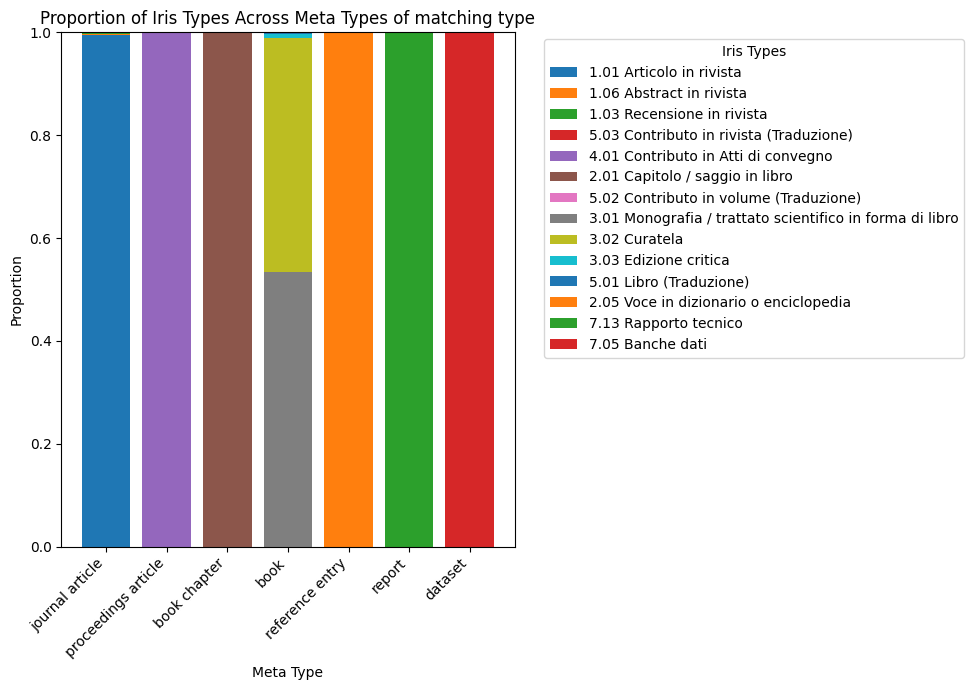

In [186]:
import matplotlib.pyplot as plt
import numpy as np

viz_df = (
(
    matching_type
    .group_by('meta_type')
    .agg([
        pl.len().alias('count'),
        pl.col('iris_type').value_counts(sort=True).alias('iris_types').struct.rename_fields(['iris_type', 'iris_count'])
    ])
).sort('count', descending=True).collect()
    .explode("iris_types")
    .with_columns([
        pl.col("iris_types").struct.field("iris_type").alias("iris_type"),
        pl.col("iris_types").struct.field("iris_count").alias("iris_count")
    ])
    .drop("iris_types")
)
viz_df_pivot = viz_df.pivot(values="iris_count", index="meta_type", on="iris_type")


df_pivot = viz_df_pivot.fill_null(0)

meta_types = df_pivot['meta_type'].to_list()
iris_types = df_pivot.columns[1:]  # All columns except 'meta_type'

bar_data = np.array([df_pivot[col].to_list() for col in iris_types])
bar_data_normalized = bar_data / bar_data.sum(axis=0)

fig, ax = plt.subplots(figsize=(10, 7))
bottom = np.zeros(len(meta_types))

for i, iris_type in enumerate(iris_types):
    ax.bar(meta_types, bar_data_normalized[i], bottom=bottom, label=iris_type)
    bottom += bar_data_normalized[i]

ax.set_title("Proportion of Iris Types Across Meta Types of matching type")
ax.set_xlabel("Meta Type")
ax.set_ylabel("Proportion")
ax.legend(title="Iris Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Analysis of the non-matching types

In [179]:
non_matching_type = lf_iim.join(type_map.lazy(), on=["iris_type", "meta_type"], how='anti')
print(non_matching_type.select(pl.len()).collect().item(), 'elements with non-matching type')

#examples of non-matching types
non_matching_type.with_columns(
    pl.concat_list('meta_type', 'iris_type').alias('types'),
).head().collect()

10344 elements with non-matching type


id,title,meta_type,pub_date,omid,iris_id,iris_type,types
str,str,str,str,str,i64,str,list[str]
"""doi:10.3390/cancers13163944""","""Challenges In The Use Of Artif…","""journal article""","""2021-08-05""","""omid:br/06150702306""",608412,"""1.04 Replica / breve intervent…","[""journal article"", ""1.04 Replica / breve intervento (e simili)""]"
"""doi:10.1016/j.sbspro.2012.09.9…","""Effects Of Flickering Seizures…","""journal article""","""2012-10""","""omid:br/061501473812""",161375,"""4.01 Contributo in Atti di con…","[""journal article"", ""4.01 Contributo in Atti di convegno""]"
"""doi:10.1016/j.sbspro.2012.09.9…","""Traffic Psychology And Driver …","""journal article""","""2012-10""","""omid:br/061501473889""",161387,"""4.01 Contributo in Atti di con…","[""journal article"", ""4.01 Contributo in Atti di convegno""]"
"""doi:10.1016/j.sbspro.2012.09.8…","""A Study On Texture And Acousti…","""journal article""","""2012-10""","""omid:br/061501473827""",161395,"""4.01 Contributo in Atti di con…","[""journal article"", ""4.01 Contributo in Atti di convegno""]"
"""doi:10.1016/j.sbspro.2012.09.8…","""Discrete Element Modelling Of …","""journal article""","""2012-10""","""omid:br/061501473819""",161373,"""4.01 Contributo in Atti di con…","[""journal article"", ""4.01 Contributo in Atti di convegno""]"


In [250]:
(
    non_matching_type
    .group_by('meta_type')
    .agg([
        pl.len().alias('count'),
        pl.col('iris_type').value_counts(sort=True).alias('iris_types').struct.rename_fields(['iris_type', 'iris_count'])
    ])
).sort('count', descending=True).collect()

meta_type,count,iris_types
str,u32,list[struct[2]]
null,3585,"[{""1.01 Articolo in rivista"",2414}, {""4.01 Contributo in Atti di convegno"",424}, … {""3.07 Bibliografia"",1}]"
"""journal article""",3355,"[{""1.04 Replica / breve intervento (e simili)"",1716}, {""4.01 Contributo in Atti di convegno"",1256}, … {""2.05 Voce in dizionario o enciclopedia"",1}]"
"""book chapter""",2237,"[{""4.01 Contributo in Atti di convegno"",1693}, {""1.01 Articolo in rivista"",398}, … {""1.06 Abstract in rivista"",1}]"
"""proceedings article""",486,"[{""1.01 Articolo in rivista"",275}, {""2.01 Capitolo / saggio in libro"",119}, … {""3.02 Curatela"",4}]"
"""book""",448,"[{""2.01 Capitolo / saggio in libro"",342}, {""4.01 Contributo in Atti di convegno"",39}, … {""7.05 Banche dati"",1}]"
"""web content""",89,"[{""1.01 Articolo in rivista"",83}, {""4.01 Contributo in Atti di convegno"",2}, … {""1.04 Replica / breve intervento (e simili)"",1}]"
"""proceedings""",60,"[{""4.01 Contributo in Atti di convegno"",49}, {""4.02 Riassunto (Abstract)"",4}, … {""7.13 Rapporto tecnico"",1}]"
"""report""",23,"[{""4.01 Contributo in Atti di convegno"",13}, {""1.01 Articolo in rivista"",5}, … {""2.01 Capitolo / saggio in libro"",2}]"
"""reference book""",20,"[{""2.01 Capitolo / saggio in libro"",13}, {""2.05 Voce in dizionario o enciclopedia"",4}, {""1.01 Articolo in rivista"",3}]"


In [264]:
bar_data_normalized

array([[6.73361227e-01, 0.00000000e+00, 1.77916853e-01, 5.65843621e-01,
        4.24107143e-02, 9.32584270e-01, 0.00000000e+00, 2.17391304e-01,
        1.50000000e-01, 7.33333333e-01, 2.66666667e-01, 5.00000000e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.18270572e-01, 3.74366617e-01, 7.56817166e-01, 0.00000000e+00,
        8.70535714e-02, 2.24719101e-02, 8.16666667e-01, 5.65217391e-01,
        0.00000000e+00, 2.00000000e-01, 0.00000000e+00, 2.50000000e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.09902371e-01, 5.09687034e-02, 0.00000000e+00, 2.44855967e-01,
        7.63392857e-01, 0.00000000e+00, 3.33333333e-02, 8.69565217e-02,
        6.50000000e-01, 0.00000000e+00, 7.33333333e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.175

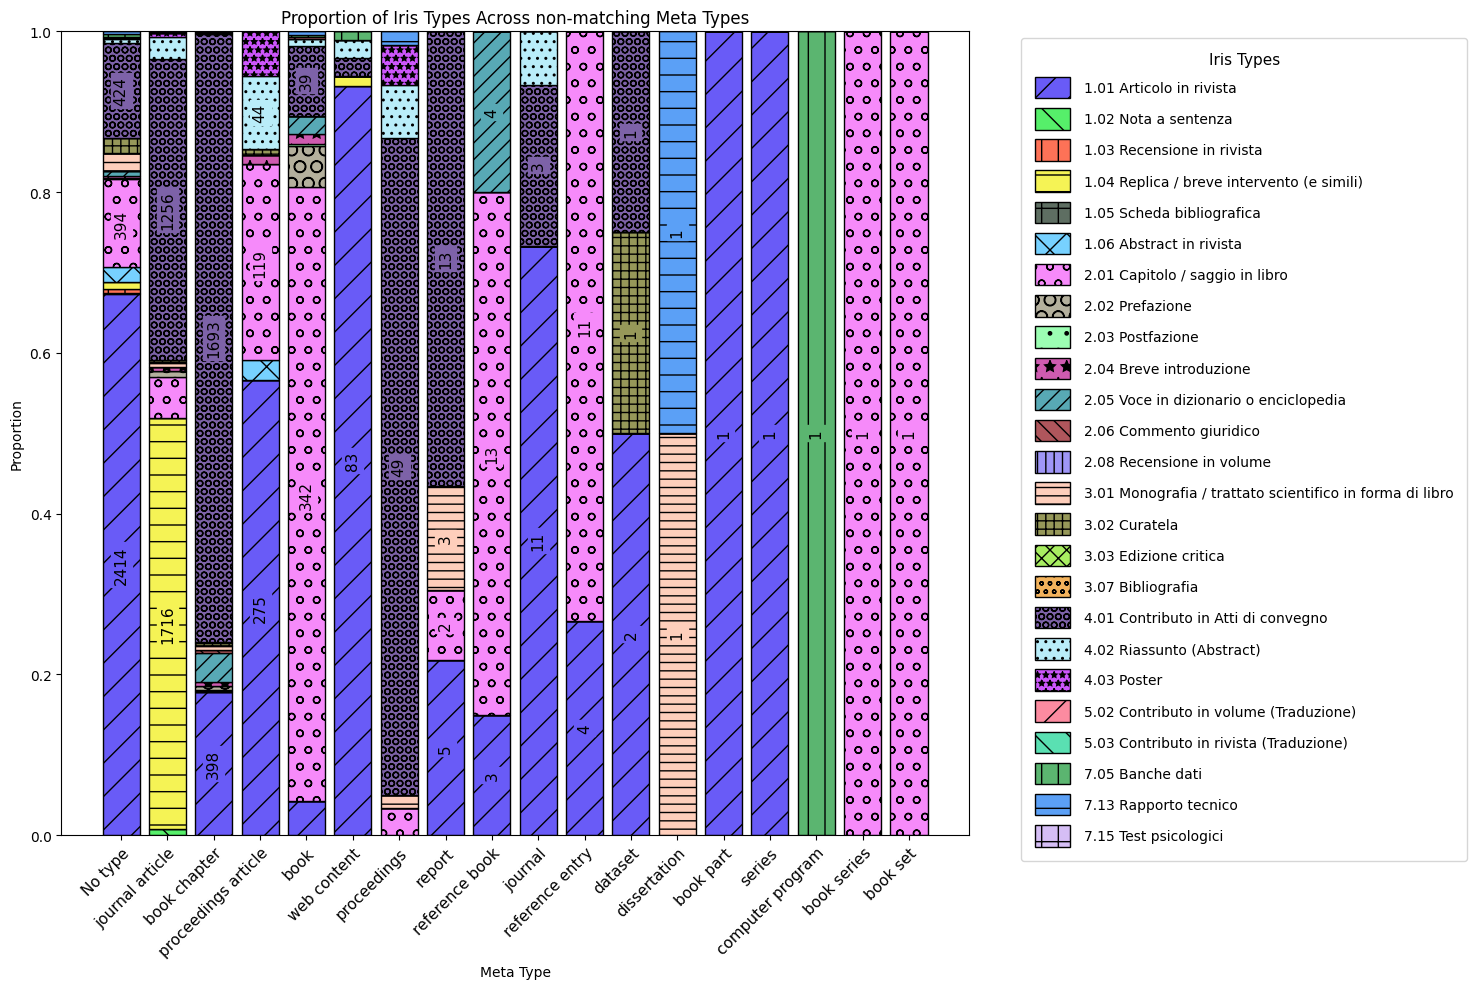

In [268]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import distinctipy


viz_df = (
    (
        non_matching_type
        .group_by('meta_type')
        .agg([
            pl.len().alias('count'),
            pl.col('iris_type').value_counts(sort=True).alias(
                'iris_types').struct.rename_fields(['iris_type', 'iris_count'])
        ])
    ).sort('count', descending=True)
    .collect()
    .fill_null('No type')
    .explode("iris_types")
    .with_columns([
        pl.col("iris_types").struct.field("iris_type").alias("iris_type"),
        pl.col("iris_types").struct.field("iris_count").alias("iris_count")
    ])
    .drop("iris_types")
)

viz_df_pivot = viz_df.pivot(
    values="iris_count", index="meta_type", on="iris_type")


df_pivot = viz_df_pivot.fill_null(0)

meta_types = df_pivot['meta_type'].to_list()
iris_types = sorted(df_pivot.columns[1:])

bar_data = np.array([df_pivot[col].to_list() for col in iris_types])
bar_data_normalized = bar_data / bar_data.sum(axis=0)

fig, ax = plt.subplots(figsize=(15, 10))
bottom = np.zeros(len(meta_types))
colors = distinctipy.get_colors(len(iris_types), pastel_factor=0.5)
patterns = ["/", "\\", "|", "-", "+", "x", "o", "O", ".", "*"] + ['//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**']

for i, (iris_type, color) in enumerate(zip(iris_types, colors)):
    heights = bar_data_normalized[i]
    bars = ax.bar(
        meta_types,
        bar_data_normalized[i],
        bottom=bottom,
        label=iris_type,
        color=color,
        hatch=patterns[i % len(patterns)],
        edgecolor='black'  # Optional: improves hatch visibility
    )
    
    for j, rect in enumerate(bars):
        height = heights[j]
        count = bar_data[i, j]
        if height > 0.08:
            center_y = bottom[j] + height / 2
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                center_y,
                f'{int(count)}',
                ha='center',
                va='center',
                color='black',
                rotation=90,
                fontsize=11,
                bbox=dict(facecolor=color, edgecolor=color, boxstyle='square,pad=0.2', alpha=1)
            )
    
    bottom += heights

ax.set_title("Proportion of Iris Types Across non-matching Meta Types")
ax.set_xlabel("Meta Type")
ax.set_ylabel("Proportion")
legend = ax.legend(
    title="Iris Types",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    handlelength=2.5,     # Width of legend marker
    handleheight=2.0,     # Height of legend marker
    handletextpad=1.0,    # Space between marker and text
    labelspacing=0.7,     # Vertical space between labels
    borderaxespad=0.5,    # Padding between plot and legend
    borderpad=1.0,        # Padding inside legend border
    fontsize=10,
    title_fontsize=11
)

labels = ax.get_xticklabels()
for label in labels:
    transform = label.get_transform()
    offset = mtransforms.ScaledTranslation(8/72, 0, fig.dpi_scale_trans)  # Shift right by 3 points
    label.set_transform(transform + offset)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.tight_layout()
plt.show()

---

## RQ 3. What is the amount of citations (according to OpenCitations Index) included in the IRIS publications that are involved in OpenCitations Meta (as citing entity and as cited entity)?

In [ ]:
lf_iii = pl.scan_parquet('../data/iris_in_index/iris_in_index.parquet')

rq3 = lf_iii.select(pl.len()).collect()
rq3

len
u32
7723941


## RQ 4. How many of these citations come from and go to publications that are not included in IRIS?

In [145]:
lf_iim = pl.scan_parquet('../data/iris_in_meta/iris_in_meta.parquet')

omids_list = (
    lf_iim
    .select('omid')
    .collect()
)['omid'].to_list()

len(omids_list)

141591

In [ ]:
#rq4
rq4a = (
    lf_iii
    .select('citing')
    .filter(
        ~pl.col('citing').is_in(omids_list)
    )
    .select(pl.len())
    .collect(streaming=True)
).item()

rq4b = (
    lf_iii
    .select('cited')
    .filter(
        ~pl.col('cited').is_in(omids_list)
    )
    .select(pl.len())
    .collect(streaming=True)
).item()


rq4 = pl.DataFrame({'citing': [rq4a], 'cited': [rq4b]})
rq4

# old: 
#3441830	3989540

citing,cited
i64,i64
3441830,3989540


## RQ 5. How many of these citations involve publications in IRIS as both citing and cited entities?

In [ ]:
rq5 = (
    lf_iii
    .select('citing', 'cited')
    .filter(
        pl.col('citing').is_in(omids_list) & pl.col(
            'cited').is_in(omids_list)
    )
    .select(pl.len())
    .collect()
)

rq5

# old: 359273

len
u32
353414


# Iris No ID analysis

In [153]:
inoid = pl.scan_parquet('../data/iris_no_id/iris_no_id.parquet')

print(inoid.collect().shape)
inoid.head().collect()

(139033, 14)


ITEM_ID,IDE_DOI,IDE_ISBN,IDE_PMID,OWNING_COLLECTION,OWNING_COLLECTION_DES,DES_ALLPEOPLE,DES_NUMBEROFAUTHORS,DATE_ISSUED_YEAR,TITLE,PUB_NAME,PUB_PLACE,PUB_COUNTRY,LAN_ISO
i64,str,str,str,i64,str,str,i64,i64,str,str,str,str,str
71134,null,null,null,58,"""4.02 Riassunto (Abstract)""","""G. Bartoli; M. Massaccesi; M. …",5,2005,"""Applications of CeCl3.7H2O-NaI…","""sn""","""SL""","""ITA""","""eng"""
65970,null,null,null,58,"""4.02 Riassunto (Abstract)""","""Bruzzi L.; Righi S.; Verità S.""",3,2005,"""Radioattività naturale delle m…",null,null,null,"""ita"""
71969,null,null,null,41,"""2.01 Capitolo / saggio in libr…","""Sciullo G.""",1,2006,"""Gli istituti generali di sempl…","""Giuffrè""","""MILANO""","""ITA""","""ita"""
72395,null,null,null,35,"""1.01 Articolo in rivista""","""M. Borraccetti""",1,2004,"""Commento all’art.8 d.lgs. 154/…",null,null,null,"""ita"""
74363,null,null,null,35,"""1.01 Articolo in rivista""","""A. Segrè""",1,2006,"""2005: agricoltura centro o fin…",null,null,null,"""ita"""


In [154]:
inoid.filter(pl.col('DES_ALLPEOPLE').str.contains('Beghelli')).collect()

ITEM_ID,IDE_DOI,IDE_ISBN,IDE_PMID,OWNING_COLLECTION,OWNING_COLLECTION_DES,DES_ALLPEOPLE,DES_NUMBEROFAUTHORS,DATE_ISSUED_YEAR,TITLE,PUB_NAME,PUB_PLACE,PUB_COUNTRY,LAN_ISO
i64,str,str,str,i64,str,str,i64,i64,str,str,str,str,str
143565,null,null,null,41,"""2.01 Capitolo / saggio in libr…","""M. Beghelli""",1,2010,"""Un'opera nata a tavolino""","""Fondazione lirico sinfonica Pe…","""BARI""","""ITA""","""ita"""
69390,null,null,null,37,"""1.03 Recensione in rivista""","""M. Beghelli""",1,2005,"""Il viaggio di Ian""",null,null,null,"""ita"""
98800,null,null,null,37,"""1.03 Recensione in rivista""","""M. Beghelli""",1,2008,"""Zelmira politica""",null,null,null,"""ita"""
249725,null,null,null,76,"""7.12 Attività espositiva:Mostr…","""Beghelli, Marco""",1,2016,"""Archivio del Canto""",null,null,null,"""ita"""
143563,null,null,null,41,"""2.01 Capitolo / saggio in libr…","""M. Beghelli""",1,2011,"""La musica contro le parole""","""Edizioni del Teatro alla Scala""","""MILANO""","""ITA""","""ita"""
81941,null,null,null,37,"""1.03 Recensione in rivista""","""M. Beghelli""",1,2006,"""Don Giovanni jr.""",null,null,null,"""ita"""
69412,null,null,null,35,"""1.01 Articolo in rivista""","""M. Beghelli""",1,2004,"""Note d'artificio""",null,null,null,"""ita"""
67637,null,null,null,37,"""1.03 Recensione in rivista""","""M. Beghelli""",1,2005,"""Affetti fuor di grammatica""",null,null,null,"""ita"""
69002,null,null,null,37,"""1.03 Recensione in rivista""","""M. Beghelli""",1,2005,"""Camera italiana""",null,null,null,"""ita"""


In [155]:
print(inoid.group_by('OWNING_COLLECTION_DES').agg(pl.len()).sort('len', descending=True).collect().to_pandas().to_latex(index=False))

\begin{tabular}{lr}
\toprule
OWNING_COLLECTION_DES & len \\
\midrule
1.01 Articolo in rivista & 55417 \\
4.02 Riassunto (Abstract) & 18765 \\
4.01 Contributo in Atti di convegno & 16891 \\
2.01 Capitolo / saggio in libro & 10316 \\
1.03 Recensione in rivista & 6160 \\
8.01 Ruolo editoriale in rivista & 3624 \\
1.06 Abstract in rivista & 3556 \\
8.04 Coordinamento di progetti di ricerca & 2804 \\
1.04 Replica / breve intervento (e simili) & 2431 \\
4.03 Poster & 2368 \\
3.01 Monografia / trattato scientifico in forma di libro & 2116 \\
7.12 Attività espositiva:Mostra o Esposizione & 1990 \\
1.02 Nota a sentenza & 1800 \\
3.02 Curatela & 1742 \\
8.02 Ruolo editoriale in collana & 1239 \\
2.05 Voce in dizionario o enciclopedia & 1028 \\
6.01 Brevetto & 902 \\
2.04 Breve introduzione & 775 \\
7.13 Rapporto tecnico & 669 \\
7.04 Software & 588 \\
5.03 Contributo in rivista (Traduzione) & 466 \\
8.03 Direzione di scavi archeologici & 374 \\
2.02 Prefazione & 355 \\
2.06 Commento giuridico & 

In [156]:
inoid.group_by('OWNING_COLLECTION_DES').agg(pl.len()).sort('len', descending=True).collect()

OWNING_COLLECTION_DES,len
str,u32
"""1.01 Articolo in rivista""",55417
"""4.02 Riassunto (Abstract)""",18765
"""4.01 Contributo in Atti di con…",16891
"""2.01 Capitolo / saggio in libr…",10316
"""1.03 Recensione in rivista""",6160
"""8.01 Ruolo editoriale in rivis…",3624
"""1.06 Abstract in rivista""",3556
"""8.04 Coordinamento di progetti…",2804
"""1.04 Replica / breve intervent…",2431


In [157]:
inoid.group_by('DES_ALLPEOPLE').agg(pl.len()).sort('len', descending=True).collect()  

DES_ALLPEOPLE,len
str,u32
null,14025
"""M. Beghelli""",209
"""Michele Marchi""",151
"""Rivoltella, Pier Cesare""",125
"""Soldati N.""",124
"""A. Segrè""",117
"""M.G.Bellardi""",106
"""Benozzo F.""",104
"""FINCARDI, Marco""",102


# Iris Not in Meta analysis

In [150]:
inim = pl.scan_parquet('../data/iris_not_in_meta/iris_not_in_meta.parquet')

print(inim.select(pl.len()).collect().item())
inim.head().collect()

41434


iris_id,iris_type,id
i64,i64,str
70006,35,"""doi:10.1441/13328"""
155300,40,"""doi:10.1016/s0021-9290(12)7022…"
161625,36,"""doi:10.3280/diri2012-002008"""
162149,57,"""doi:10.4229/27theupvsec2012-1a…"
160467,35,"""doi:10.6092/issn.2036-1602/262…"


In [151]:
inim.group_by(pl.col('id').str.slice(0, 4)).agg([
    pl.len()
]).collect()

id,len
str,u32
"""isbn""",19527
"""pmid""",1167
"""doi:""",20740


In [152]:
print(inim.group_by('iris_type').agg(pl.len()).sort('len', descending=True).collect().with_columns(pl.col('iris_type').replace_strict(type_dict)).to_pandas().to_latex(index=False))

\begin{tabular}{lr}
\toprule
iris_type & len \\
\midrule
1.01 Articolo in rivista & 14251 \\
2.01 Capitolo / saggio in libro & 11159 \\
4.01 Contributo in Atti di convegno & 5665 \\
3.01 Monografia / trattato scientifico in forma di libro & 3278 \\
3.02 Curatela & 1587 \\
1.03 Recensione in rivista & 919 \\
4.02 Riassunto (Abstract) & 745 \\
1.06 Abstract in rivista & 697 \\
1.04 Replica / breve intervento (e simili) & 519 \\
2.04 Breve introduzione & 401 \\
2.05 Voce in dizionario o enciclopedia & 384 \\
2.02 Prefazione & 374 \\
5.01 Libro (Traduzione) & 226 \\
3.03 Edizione critica & 208 \\
4.03 Poster & 187 \\
7.13 Rapporto tecnico & 119 \\
2.06 Commento giuridico & 105 \\
5.02 Contributo in volume (Traduzione) & 92 \\
2.03 Postfazione & 82 \\
7.05 Banche dati & 79 \\
2.07 Scheda di catalogo & 79 \\
1.02 Nota a sentenza & 75 \\
1.05 Scheda bibliografica & 39 \\
5.03 Contributo in rivista (Traduzione) & 39 \\
3.07 Bibliografia & 27 \\
3.04 Pubblicazione di fonti inedite & 24 \\
3.08 